In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
dados = pd.read_csv('resultados.csv')
modelos = [
  'full',
  'PageHinkley',
  'PeriodicCut',
  'RandomCut',
  'TopDownReg',
  'TopDownIndex',
]
resultados = {
  'mean_comp': [],
  'std_comp': [],
  'mean_MAE': [],
  'std_MAE': [],
  'mean_RMSE': [],
  'std_RMSE': [],
  'mean_std_comp': [],
  'std_std_comp': [],
  'mean_tempo': [],
  'std_tempo': [],
  'mean_num_seg': [],
  'std_num_seg': [],
  'num_res': [],
}

In [9]:
dados = dados.replace([np.inf, -np.inf], np.nan).dropna(axis=0, how='any').reset_index(drop=True)

In [10]:
dados

,nome,model,file,MAE (erro entre a série inteira e a predição de todos os segmentos),RMSE (erro entre a série inteira e a predição de todos os segmentos),complexidade (média dos segmentos),desvio padrão complexidade,tempo,numero de segmentos
0,Full_0_5dias_umidrelmed2m_2017-01-05 _ 2017-01...,full,5dias_umidrelmed2m_2017-01-05 _ 2017-01-10.csv,4.044833,5.177530,25.00000,0.000000,73.410340,1
1,PageHinkley_0_5dias_umidrelmed2m_2017-01-05 _ ...,PageHinkley,5dias_umidrelmed2m_2017-01-05 _ 2017-01-10,5.141806,6.452205,12.00000,0.000000,6.460097,1
2,PeriodicCut_0_5dias_umidrelmed2m_2017-01-05 _ ...,PeriodicCut,5dias_umidrelmed2m_2017-01-05 _ 2017-01-10,4.510361,5.624847,29.00000,0.000000,8.381686,1
3,RandomCut_1_0_5dias_umidrelmed2m_2017-01-05 _ ...,RandomCut_1,5dias_umidrelmed2m_2017-01-05 _ 2017-01-10,4.501209,5.650989,25.00000,0.000000,6.328006,1
4,RandomCut_2_0_5dias_umidrelmed2m_2017-01-05 _ ...,RandomCut_2,5dias_umidrelmed2m_2017-01-05 _ 2017-01-10,5.147822,6.460998,10.00000,0.000000,7.009611,1
...,...,...,...,...,...,...,...,...,...
225,TopDownReg_48_50_0_5dias_umidrelmed2m_2018-02-...,TopDownReg_48_50,5dias_umidrelmed2m_2018-02-23 _ 2018-02-28,2.625849,3.414484,24.62500,6.163147,515.044564,8
226,TopDownReg_96_50_0_5dias_umidrelmed2m_2018-02-...,TopDownReg_96_50,5dias_umidrelmed2m_2018-02-23 _ 2018-02-28,3.049524,4.153466,26.60000,9.264988,324.962271,5
227,TopDownReg_48_75_0_5dias_umidrelmed2m_2018-02-...,TopDownReg_48_75,5dias_umidrelmed2m_2018-02-23 _ 2018-02-28,2.896210,3.912417,22.80000,7.386474,328.993262,5
228,TopDownReg_96_75_0_5dias_umidrelmed2m_2018-02-...,TopDownReg_96_75,5dias_umidrelmed2m_2018-02-23 _ 2018-02-28,4.099562,5.501250,27.60000,5.782733,321.523773,5


In [11]:
for model in modelos:
  dados_estat = dados[dados.model.str.startswith(model)]
  resultados['mean_comp'].append(np.mean(dados_estat['complexidade (média dos segmentos)']))
  resultados['std_comp'].append(np.std(dados_estat['complexidade (média dos segmentos)']))
  resultados['mean_MAE'].append(np.mean(dados_estat['MAE (erro entre a série inteira e a predição de todos os segmentos)']))
  resultados['std_MAE'].append(np.std(dados_estat['MAE (erro entre a série inteira e a predição de todos os segmentos)']))
  resultados['mean_RMSE'].append(np.mean(dados_estat['RMSE (erro entre a série inteira e a predição de todos os segmentos)']))
  resultados['std_RMSE'].append(np.std(dados_estat['RMSE (erro entre a série inteira e a predição de todos os segmentos)']))
  resultados['mean_std_comp'].append(np.mean(dados_estat['desvio padrão complexidade']))
  resultados['std_std_comp'].append(np.std(dados_estat['desvio padrão complexidade']))
  resultados['mean_tempo'].append(np.mean(dados_estat['tempo']))
  resultados['std_tempo'].append(np.std(dados_estat['tempo']))
  resultados['mean_num_seg'].append(np.mean(dados_estat['numero de segmentos']))
  resultados['std_num_seg'].append(np.std(dados_estat['numero de segmentos']))
  resultados['num_res'].append(len(dados_estat))

In [12]:
estatisticas_df = pd.DataFrame(resultados, index=modelos)
estatisticas_df

,mean_comp,std_comp,mean_MAE,std_MAE,mean_RMSE,std_RMSE,mean_std_comp,std_std_comp,mean_tempo,std_tempo,mean_num_seg,std_num_seg,num_res
full,17.750000,6.430721,7.309300,2.664581,9.127022,3.008535,0.000000,0.000000,41.420918,22.394186,1.000000,0.000000,12
PageHinkley,22.930449,5.897496,4.221205,1.549992,5.493704,1.754027,3.067842,3.131014,123.629503,118.806025,3.916667,3.402409,12
PeriodicCut,23.208333,4.300692,4.281700,1.119144,5.569256,1.366602,3.387509,2.930802,85.994389,71.155873,2.750000,1.876388,12
RandomCut,22.247779,5.595251,4.464914,1.901230,5.846090,2.252267,4.178527,4.045575,145.322440,165.364038,4.777778,4.967176,36
TopDownReg,23.744043,3.577198,2.446713,1.376354,3.281943,1.729636,6.205612,2.346651,366.289980,608.417322,11.555556,14.106486,126
TopDownIndex,8.091036,4.276914,22.234661,115.020586,455.894078,2525.385703,9.598965,2.037194,2122.448219,2072.974109,61.937500,37.981852,32


In [14]:
estatisticas_df[[col for col in estatisticas_df.columns if 'comp' in col]]

,mean_comp,std_comp,mean_std_comp,std_std_comp
full,17.750000,6.430721,0.000000,0.000000
PageHinkley,22.930449,5.897496,3.067842,3.131014
PeriodicCut,23.208333,4.300692,3.387509,2.930802
RandomCut,22.247779,5.595251,4.178527,4.045575
TopDownReg,23.744043,3.577198,6.205612,2.346651
TopDownIndex,8.091036,4.276914,9.598965,2.037194


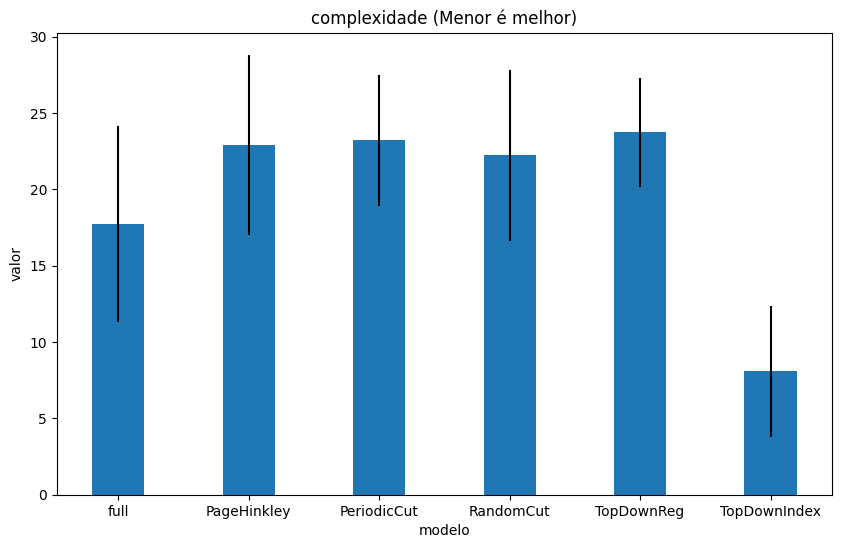

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(modelos,  estatisticas_df.mean_comp, width=0.4, yerr = estatisticas_df.std_comp)
plt.xlabel('modelo')
plt.ylabel('valor')
plt.title('complexidade (Menor é melhor)')
plt.show()

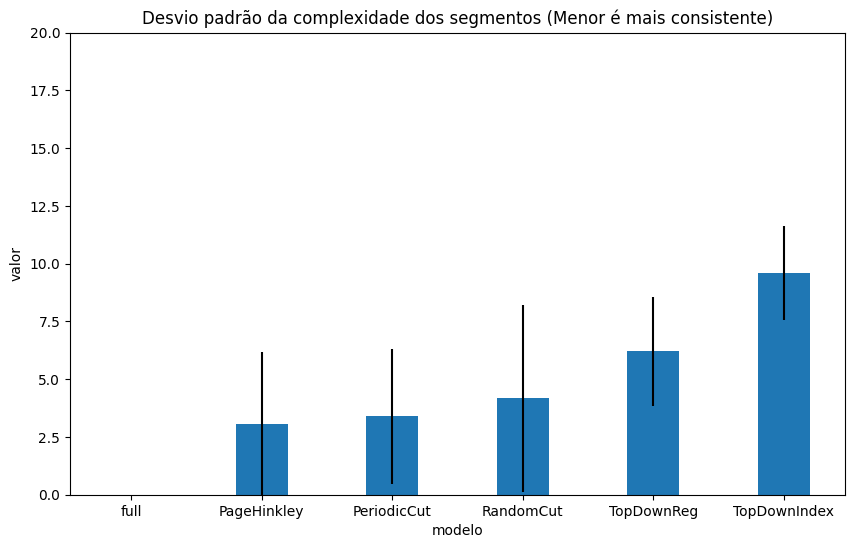

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(modelos,  estatisticas_df.mean_std_comp, width=0.4, yerr = estatisticas_df.std_std_comp)
plt.xlabel('modelo')
plt.ylabel('valor')
plt.ylim((0, 20))
plt.title('Desvio padrão da complexidade dos segmentos (Menor é mais consistente)')
plt.show()

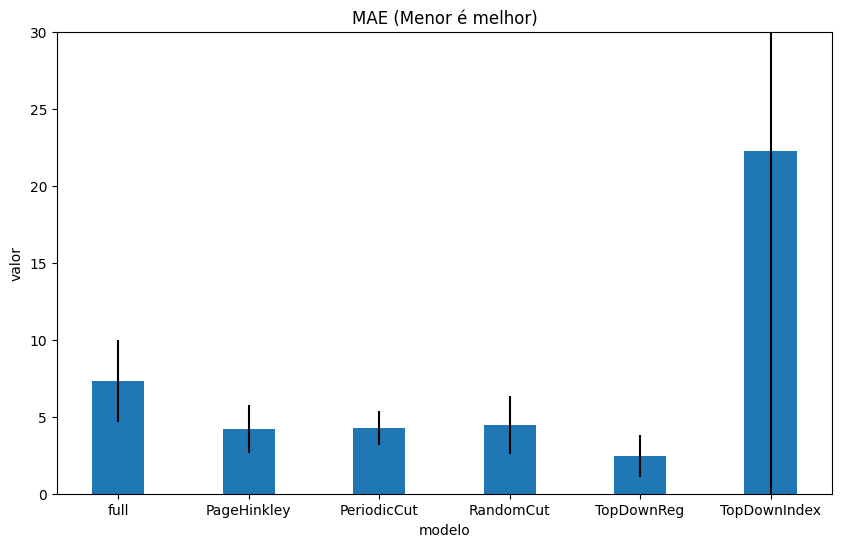

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(modelos,  estatisticas_df.mean_MAE, width=0.4, yerr = estatisticas_df.std_MAE)
plt.xlabel('modelo')
plt.ylabel('valor')
plt.ylim((0, 30))
plt.title('MAE (Menor é melhor)')
plt.show()

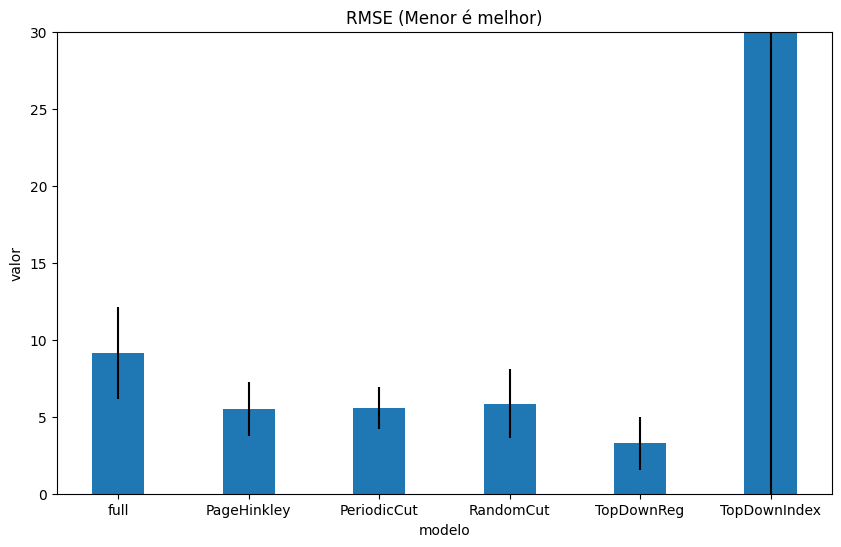

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(modelos,  estatisticas_df.mean_RMSE, width=0.4, yerr = estatisticas_df.std_RMSE)
plt.xlabel('modelo')
plt.ylabel('valor')
plt.ylim((0, 30))
plt.title('RMSE (Menor é melhor)')
plt.show()

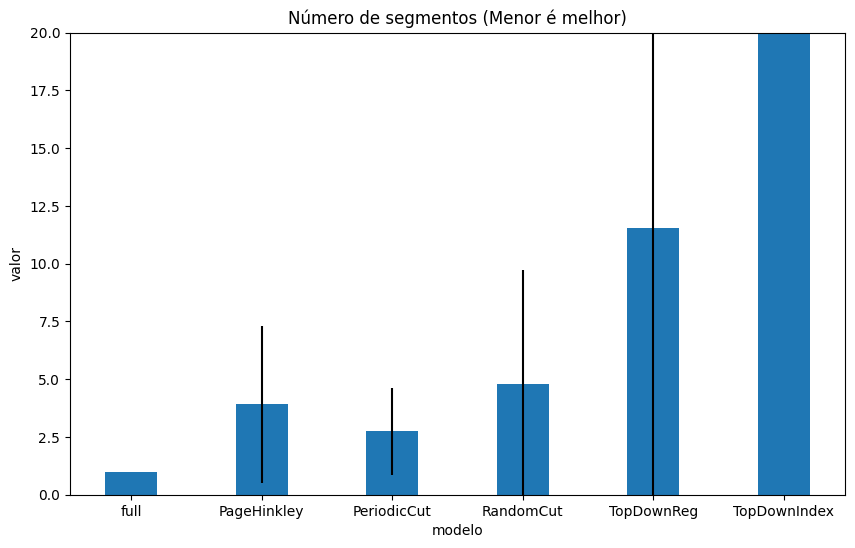

In [44]:
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(modelos,  estatisticas_df.mean_num_seg, width=0.4, yerr = estatisticas_df.std_num_seg)
plt.xlabel('modelo')
plt.ylabel('valor')
plt.ylim((0, 20))
plt.title('Número de segmentos (Menor é melhor)')
plt.show()

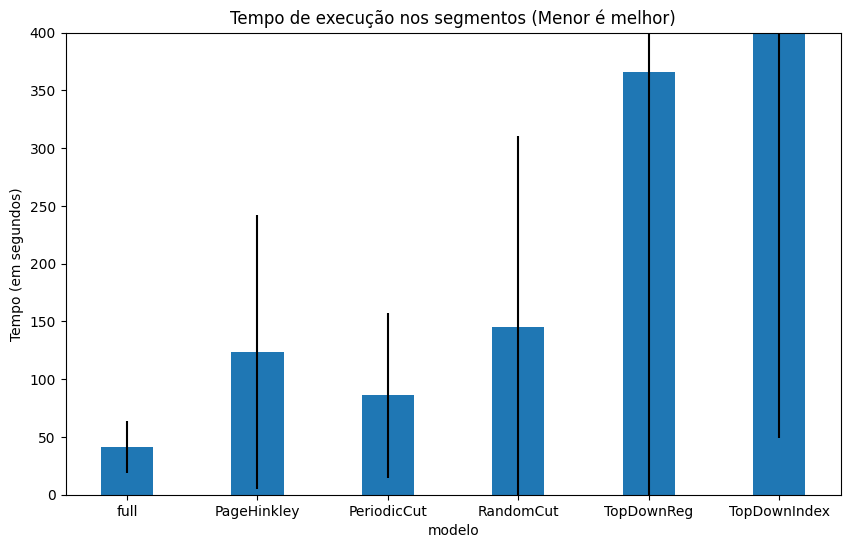

In [52]:
fig, ax = plt.subplots(figsize=(10,6))
plt.bar(modelos,  estatisticas_df.mean_tempo, width=0.4, yerr = estatisticas_df.std_tempo)
plt.xlabel('modelo')
plt.ylabel('Tempo (em segundos)')
plt.ylim((0, 400))
plt.title('Tempo de execução nos segmentos (Menor é melhor)')
plt.show()

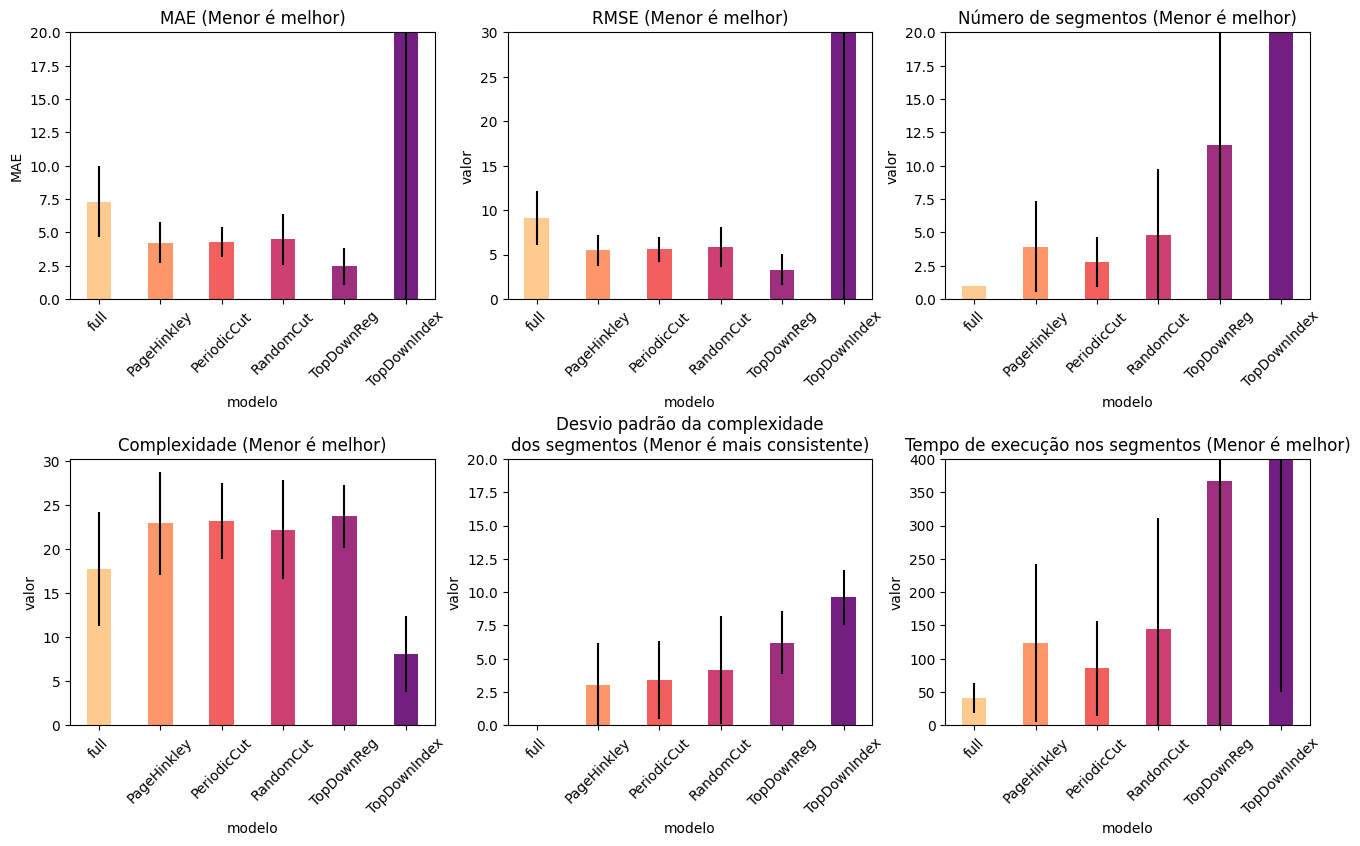

In [107]:
colors = plt.colormaps['magma'].reversed()(np.linspace(0, 1, 10)[1:-3])

fig, ((axMAE, axRMSE, axNseg), (axComp, axStdComp, axTempo)) = plt.subplots(nrows=2, ncols=3, figsize=(16,9))

axMAE.bar(modelos,  estatisticas_df.mean_MAE, width=0.4, yerr = estatisticas_df.std_MAE, color=colors)
axMAE.set_xlabel('modelo')
axMAE.tick_params(axis='x', labelrotation=45)
axMAE.set_ylabel('MAE')
axMAE.set_ylim((0, 20))
axMAE.set_title('MAE (Menor é melhor)')

axComp.bar(modelos,  estatisticas_df.mean_comp, width=0.4, yerr = estatisticas_df.std_comp, color=colors)
axComp.set_xlabel('modelo')
axComp.tick_params(axis='x', labelrotation=45)
axComp.set_ylabel('valor')
axComp.set_title('Complexidade (Menor é melhor)')

axStdComp.bar(modelos,  estatisticas_df.mean_std_comp, width=0.4, yerr = estatisticas_df.std_std_comp, color=colors)
axStdComp.set_xlabel('modelo')
axStdComp.tick_params(axis='x', labelrotation=45)
axStdComp.set_ylabel('valor')
axStdComp.set_ylim((0, 20))
axStdComp.set_title('Desvio padrão da complexidade\ndos segmentos (Menor é mais consistente)')


axRMSE.bar(modelos,  estatisticas_df.mean_RMSE, width=0.4, yerr = estatisticas_df.std_RMSE, color=colors)
axRMSE.set_xlabel('modelo')
axRMSE.tick_params(axis='x', labelrotation=45)
axRMSE.set_ylabel('valor')
axRMSE.set_ylim((0, 30))
axRMSE.set_title('RMSE (Menor é melhor)')

axNseg.bar(modelos,  estatisticas_df.mean_num_seg, width=0.4, yerr = estatisticas_df.std_num_seg, color=colors)
axNseg.set_xlabel('modelo')
axNseg.tick_params(axis='x', labelrotation=45)
axNseg.set_ylabel('valor')
axNseg.set_ylim((0, 20))
axNseg.set_title('Número de segmentos (Menor é melhor)')

axTempo.bar(modelos,  estatisticas_df.mean_tempo, width=0.4, yerr = estatisticas_df.std_tempo, color=colors)
axTempo.set_xlabel('modelo')
axTempo.tick_params(axis='x', labelrotation=45)
axTempo.set_ylabel('valor')
axTempo.set_ylim((0, 400))
axTempo.set_title('Tempo de execução nos segmentos (Menor é melhor)')

plt.subplots_adjust(hspace=0.6)
plt.savefig('resultados.pdf', bbox_inches='tight')
plt.show()